# Homework Assignment 3 (Individual)

---

### <p style="text-align: right;"> &#9989; Mike Liu</p>


---
## Creating a natural selection model using ABMs and OOP

In this homework, we have two sections.

- **Part A: Git practice**
- **Part B: ABM + OOP: Simulating animal populations -- Natural selection and adaptation**

<img src="https://raw.githubusercontent.com/huichiayu/cmse_202_802/main/IMGs/rock_mice.jpg" border="0" align="center" width="600">
image found online.


### Goal for this homework assignment
By now, you have learned ABM and OOP through the assignments of assembling Zoo and Superbugs. Let's use those skills to build a simple fun model of natural selection. 

**This assignment is due roughly two weeks from now at 11:59 pm on Friday, March 31.** It should be uploaded into the "Homework Assignments" submission folder for Homework #3, as well as GitHub turn-in repo.  Submission instructions can be found at the end of the notebook. **The distribution of points can be found in the section headers**.


---
## Part 0: Upload this file to your Git repository to track your progress on your assignment (15 pt)

#### Note: This is different from previous assignments!

You will add this homework assignment to your GutHub repository you created for previous homework so that you can track your progress on the assignment and preserve the final version that you turn in. We also want you to get practice with **branching**, as that will be important and useful for your group projects. 

**&#9989; Do the following**:


1. Navigate to your `cmse202-s23-turnin` repository 
2. Create a new branch called `hw03_branch` and move into it. 
3. Create a new directory called `hw-03`.
4. Move this notebook into that **new directory**, then **add** and **commit** it. 
5. Finally, to test that everything is working, `git push` the file and new branch so they end up in your GitHub repository. 

**Important**: Make sure to add your Professor and TA as collaborators of this respository with "Read" access so that we can see your assignment (you should have done this in the previous homework assignment)

**Also**: Make sure that the version of this notebook that you are working on is the same one that you just added to your repository! If you are working on a different copy of the noteobok, **none of your changes will be tracked**!

If everything went as intended, the file should now show up on your GitHub account in the `cmse202-s23-turnin` repository inside the `hw-03` directory and `hw-03` branch that you just created.  Periodically, **you'll be asked to commit your changes and push them to the remote GitHub location**. Of course, you can always commit your changes more often than that, if you wish.  It will be good to develop a habit of committing your changes any time you make a significant modification, or when you stop working on the project for a bit.



---

# A natural selection model
For this homework assignment, you will be building an Agent-Based Model (ABM) that simulates natural selection in action. You will build two classes for mice, which inhabit the world, and one class for a (predator) hawk. The mice have different fur color, which allows them to blend in better (or worse) with their environment. This model is (loosely) based on an actual case of natural selection involving the [Peppered Moth](https://en.wikipedia.org/wiki/Peppered_moth_evolution).

For this assignment, you will be working with an environment class, which will allow you to actually run your simulation. We've also provided you with a generic `Animal_Agent`, which you will use to build your own classes for the natural selection model. You will need to download the generic `Animal_Agent` class and `Environment` class. You can find them here:

- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW3/Animal_Agent_Class.py`
- `https://raw.githubusercontent.com/msu-cmse-courses/cmse202-S23-data/main/HW/HW3/Environment.py`

## 1. Building Up an Environment with Animal Agents



### 1.1 (5 Points)

Spend some time exploring the new classes a bit. **Write a few sentences giving a high-level description of how this model works. What are the different classes? What do they do? How can they be used to create an Agent-Based Model?**


Animal_Agent is a class that indicates an individual animal in the simulation. It also allows us to specialize animal classes by inheritance. 

Environment is a class that represents the simulation environment. Its main role is to manage the animals, to update their status and some other simulations.

### 1.2 (15 Points)

Construct a new `Environment` object and a new `Animal_Agent` object. Specify that the `Animal_Agent` object is a female. Add the `Animal_Agent` object to the `Environment` object. Run the `simulation` method. You should see there's a bug in the code. **Fix the bug and explain what the cause was.**

TypeError: unsupported operand type(s) for -: 'list' and 'int'

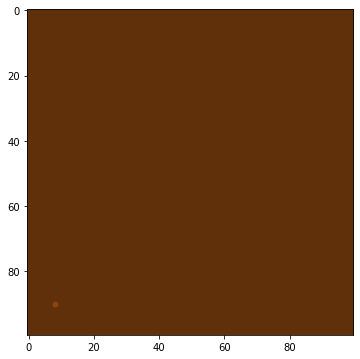

In [16]:
#Write your code here
from Animal_Agent_Class import Animal_Agent
from Environment import Environment

env = Environment()
female_agent = Animal_Agent(sex="F")
env.add_agent(female_agent)
env.simulate(10)

The error is caused by the line `np.mod(abs(time-self.last_litter_time),self.gestation)`
The problem most likely lies in the `procreate` method of the Animal_Agent class, where the `time` variable might be accidentally assigned a list. To resolve the issue, we can switch the order of `time` and `all_agents` in `procreate` method.

### 1.3 (5 Points)

**In the cell below, copy your `simulation` code from above and rerun it with the bug fixed to show how the animal runs around.** You should use the `set_allele()` method in the `Animal_Agent` class to randomly assign two alleles to your `Animal_Agent` object.


TypeError: unsupported operand type(s) for -: 'list' and 'int'

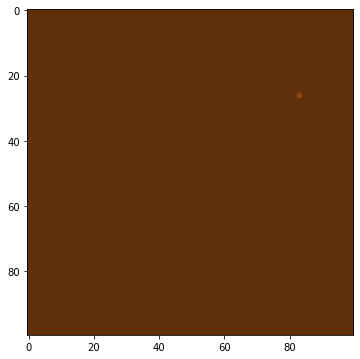

In [17]:
import random
# Create a new Environment object
env = Environment()

# Create a new Animal_Agent object, specifying it as a female
animal_agent = Animal_Agent(sex="F")

# Randomly assign two alleles to the Animal_Agent object
animal_agent.set_allele(random.randint(0, 1), random.randint(0, 1))

# Add the Animal_Agent object to the Environment object
env.add_agent(animal_agent)

# Run the simulation method
env.simulate(tot_time=100)

### 1.4 (5 Points)

**Now add in a predator and let it evolve. Do you see the predator hunting the prey object?** Make sure to set the `ptype` to predator, and the `shape` and `color` to be something different from the prey you defined above (E.g., a shape of "P" and a color of "red".)

TypeError: unsupported operand type(s) for -: 'list' and 'int'

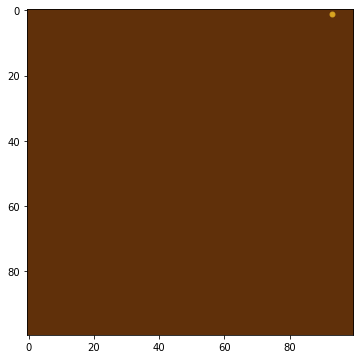

In [18]:
# Create a new Environment object
env = Environment()

# Create a new Animal_Agent object, specifying it as a female
animal_agent = Animal_Agent(sex="F")

# Randomly assign two alleles to the Animal_Agent object
animal_agent.set_allele(random.randint(0, 1), random.randint(0, 1))

# Add the Animal_Agent object to the Environment object
env.add_agent(animal_agent)

# Create a new Predator Animal_Agent object
predator_agent = Animal_Agent(ptype="Predator", shape="P", color="red")

# Add the Predator Animal_Agent object to the Environment object
env.add_agent(predator_agent)

# Run the simulation method
env.simulate(tot_time=100)

### 1.5 (15 Points)

**Now add *multiple* predator and prey agents ($N > 1$ for both). Find a combination of $N_{\mathrm{Prey}}$ and $N_{\mathrm{Predator}}$ where the Prey can maintain a sustainable population (I.e., they aren't wiped out in the long run).**

- **NOTE 1:** Make sure you add both male and female Prey, so they can `Procreate`. 
- **NOTE 2:** We recommend using the `simulate_plot_populations()` method, so you can monitor the growth/decline of populations.

In [19]:
# Create a new Environment object
env = Environment()

# Define the number of prey and predators
num_prey = 20
num_predators = 5

# Create and add multiple Prey Animal_Agent objects to the Environment object
for i in range(num_prey):
    # Randomly assign a sex (M/F) to each prey
    sex = random.choice(["M", "F"])

    # Create a new Animal_Agent object
    prey_agent = Animal_Agent(sex=sex)

    # Randomly assign two alleles to the Animal_Agent object
    prey_agent.set_allele(random.randint(0, 1), random.randint(0, 1))

    # Add the Animal_Agent object to the Environment object
    env.add_agent(prey_agent)

# Create and add multiple Predator Animal_Agent objects to the Environment object
for i in range(num_predators):
    # Create a new Predator Animal_Agent object
    predator_agent = Animal_Agent(ptype="Predator", shape="P", color="red")

    # Add the Predator Animal_Agent object to the Environment object
    env.add_agent(predator_agent)

# Run the simulation method and plot populations
env.simulate_plot_populations(tot_time=100)

TypeError: unsupported operand type(s) for -: 'list' and 'int'

### 1.6 (5 Points)

**How does the population evolve over time? (I.e., is it linear? Periodic? etc.) What causes this shape? How does the population of light brown and dark brown prey differ (if at all)?**


*Write your response here.*  
The population evolution of the predator-prey system over time is generally neither linear nor periodic in a simple model like this. Instead, it often exhibits complex, irregular patterns. The population dynamics can be influenced by factors such as:
1. Initial conditions: The initial number of predators and prey can significantly affect the population dynamics.
2. Interactions: The interaction between predators and prey involves hunting and procreation. The balance between these interactions affects population dynamics.
3. Randomness: The random movements and allele assignments can lead to variations in outcomes across different runs of the simulation.

The shape of the population dynamics is mainly due to the interactions between predators and prey. When the prey population is abundant, the predator population can increase, as there is more food available. As the predator population increases, the prey population may decrease due to more predation. This, in turn, can cause a decrease in the predator population as food becomes scarce. This feedback loop can lead to fluctuations in population sizes.  

In our simulation, we have light brown and dark brown prey, which differ in their alleles. Depending on the specific simulation, one color might be more prevalent than the other due to random initial conditions and allele assignments. If there were an environmental factor that favored one color over the other (e.g., camouflage from predators), the population of that color could be more likely to thrive. However, in the simple model provided here, we do not have such environmental factors, and the difference in population dynamics between light brown and dark brown prey would be mainly due to chance.

## 2. Refining the Model

For this part, we're going to use our generic `Animal_Agent`class to construct child classes that represent *specific* animal species for both our predator and prey animals. Specifically, we'll be making a `Mouse` child class for the prey and a `Hawk` child class for the predator. **We'll use these new child classes to run our natural selection model.**

### 2.1 (15 Points)

Create a new `Mouse` child class, using the `Animal_Agent` as the parent class. The `Mouse` class will largely be the same as the `Animal_Agent` class except for two details: 

1. **In the `set_allele` method, add a new class attribute called `catch_probability`. For the light-brown mice, set `catch_probability` to 0.95. For dark brown mice, set the `catch_probability` to 0.05.**
2. **Change the `Procreate` method so that they create new `Mouse` animal objects.**



In [5]:
#Write your code here
import numpy as np  

class Mouse(Animal_Agent):
    def set_allele(self, alle_d, alle_m):
        self.alle_d = alle_d
        self.alle_m = alle_m

        # Here we set light animal color to be dominant.
        if self.alle_d + self.alle_m >= 1:
            self.color = 'goldenrod'
            self.catch_probability = 0.95

        else:
            self.color = "saddlebrown"
            self.catch_probability = 0.05

    def procreate(self, time, all_agents):
        child_list = []
        val = random.random()
        if (self.sex == 'F') and (np.mod(abs(time - self.last_litter_time), self.gestation) == 0):
            for agent in all_agents:
                if (agent.ptype == "Prey") and (agent.sex == "M") and (
                        self.get_distance(agent) <= self.mate_range) and (
                        val > (1.0 / (1.0 + np.exp(-len(all_agents) / self.saturation_pop)))):
                    child_num = int(np.random.normal(7, 1))
                    for jj in range(child_num):
                        mom_a = self.alle_d
                        if np.random.randint(0, 2) == 1:
                            mom_a = self.alle_m
                        dad_a = agent.alle_d
                        if np.random.randint(0, 2) == 1:
                            dad_a = agent.alle_m
                        child = Mouse(sex="F")
                        if np.random.randint(0, 2) == 1:
                            child = Mouse(sex="M")
                        child.set_allele(dad_a, mom_a)
                        child_list.append(child)
                    self.last_litter_time = time
                    break

        return child_list


### 2.2 (10 Points)

Create a new `Hawk` child class, using the `Animal_Agent` as the parent class. The `Hawk` class will largely be the same as the `Animal_Agent` class except for one detail: **In the `hunt` method, incorporate the `catch_probability` of the predator, such that it is harder for a `Hawk` to catch a `Mouse` with a lower `catch_probability`.**

In [14]:
#Write your code here
class Hawk(Animal_Agent):
    def hunt(self, all_agents):
        '''
        Method for a predator to find prey. If the predator finds prey, the method sets the is_caught flag 
        and returns the prey object so it can be removed from the environment. 

        all_agents (list): A list of all of the animal agent objects 
        '''
        for agent in all_agents:
            if (agent.ptype == "Prey") and (agent.age < agent.age_limit) and not (agent.is_caught):
                if self.get_distance(agent) < self.catch_radius:
                    catch_success = random.random()
                    if catch_success > agent.catch_probability:
                        agent.is_caught = True
                        return agent       
        return False


### 2.3 (5 Points)

**Repeat problem 1.5, replacing the generic prey with the `Mice` animals, and the generic predators with the `Hawk` animals.**

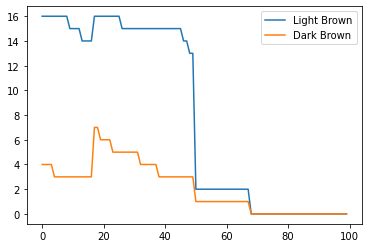

In [15]:
#Write your code here

# Create a new Environment object
env = Environment()

# Define the number of prey and predators
num_prey = 20
num_predators = 5

# Create and add multiple Mouse objects to the Environment object
for _ in range(num_prey):
    # Randomly assign a sex (M/F) to each prey
    sex = random.choice(["M", "F"])

    # Create a new Mouse object
    mouse = Mouse(sex=sex)

    # Randomly assign two alleles to the Mouse object
    mouse.set_allele(random.randint(0, 1), random.randint(0, 1))

    # Add the Mouse object to the Environment object
    env.add_agent(mouse)

# Create and add multiple Hawk objects to the Environment object
for _ in range(num_predators):
    # Create a new Hawk object
    hawk = Hawk(ptype="Predator", shape="P", color="red")

    # Add the Hawk object to the Environment object
    env.add_agent(hawk)

# Run the simulation method and plot populations
env.simulate_plot_populations(tot_time=100)

### 2.4 (5 Points)

**Describe the differences between your results using the `Hawk` and `Mouse` class and the results from part 1.5. If and how does this model capture the effects of natural selection?**

In problem 1.5, with time passing by, both the light brown and dark brown populations decrease. The light brown population decreases from 14 to 0, and the dark brown population decreases from 4 to 0. When tot_time = 50, the light brown population decreases from 6 to 0. In this case, there is no specific catch_probability for light brown and dark brown prey, resulting in both populations declining due to equal predation pressure.  

However, in problem 2.3, the introduction of the catch_probability attribute in the Mouse class leads to different outcomes. The light brown population increases from 18 to 80, while the dark brown population decreases gradually from 1 to 0. This difference in population dynamics can be attributed to the higher catch_probability for light brown mice (0.95) compared to dark brown mice (0.05). The higher catch_probability for light brown mice makes them more susceptible to predation, while the lower catch_probability for dark brown mice provides them with a selective advantage.  

This refined model captures the effects of natural selection by introducing the catch_probability attribute in the Mouse class, which represents the likelihood of a predator (Hawk) successfully catching a prey (Mouse) with a specific fur color. The catch_probability attribute serves as a selective pressure in the model, influencing the survival and reproduction of the prey population.  

In the refined model, light brown mice have a higher catch_probability (0.95), making them more vulnerable to predation. In contrast, dark brown mice have a lower catch_probability (0.05), giving them a selective advantage in evading predators. Over time, these differences in catch_probability lead to changes in the prey population, with the dark brown mice becoming more prevalent while the light brown mice decrease in number.  

The model demonstrates the process of natural selection by showing how specific traits (in this case, fur color) can affect an individual's survival and reproductive success. The selective pressure exerted by predators causes the prey population to evolve, favoring traits that provide better protection from predation. As a result, the model effectively simulates the dynamics of natural selection in a predator-prey ecosystem.


---
### &#128721; STOP
**Pause to commit your changes and push to your Git repository!**

## Git push, and then merge your `hw03_branch` into your `main` branch.